# Date-A-Scientist Portfolio Project (Codecademy Data Science)

# Introduction

As part of the Codecademy Data Science course, I was tasked with building machine learning models using data from the dating
application OKCupid. As the last project in the course where I was provided with data to work with (rather than sourcing it myself), this project was intended as an opportunity to demonstrate the programming, data visualisation, data analysis, and machine learning competencies I'd developed over the course. 

The goal of my project is to create a machine learning classification model that can predict whether a user was male or female. Below I go into more detail about the goals of the project, the data used, the analysis performed, and the evaluations undertaken.

**Project Goals**

As stated above, the primary goal of the project is to create a machine learning classification model that can predict whether a user was male or female. The reason this goal was selected was to ensure that there was enough data to build a successful machine learning model (as m/f is a compulsory column to sign up to the site), allowing me to try (and optimise) several different classification algorithms.

**Data**

The data covers the responses of OKCupid users to a number of questions, both multiple choice and longer written 'essay' questions. Each row represents an OkCupid user and each column is a different question. The data provided is in the csv file: `profiles.csv`.

**Analysis**

Firstly, I perform exploratory data analysis on the dataset, including basic descriptive statistics and data visualisation, to evaluate which variables to include in the machine learning model. After preparing and splitting the data, several different classification algorithms from the supervised learning family of machine learning models are used in an attempt to predict whether a given user is male or female. I then attempt to optimise these models.

**Evaluation**

The project concludes by evaluating the different optimised machine learning models built in the previous step. We use accuracy, precision, recall, and F1 scores to compare the quality of the models.

### Importing Modules, Loading Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Exploratory Data Analysis

The first thing to explore is whether we have enough of each category (men and women) to make a meaningful machine learning model. If the dataset were, say, 95% men, a machine learning model could just pick 'men' every time and get a 95% accuracy score, making it much harder to evaluate the success of the model.

In [11]:
df.sex.value_counts(dropna=False)

m    35829
f    24117
Name: sex, dtype: int64

In [12]:
df.sex.value_counts(normalize=True, dropna=False)

m    0.597688
f    0.402312
Name: sex, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

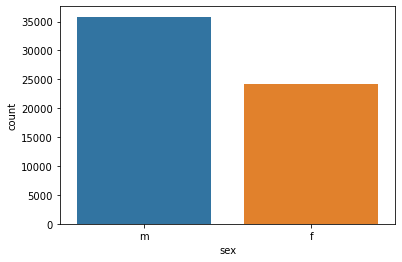

In [8]:
sns.countplot(data=df, x='sex')

As we can see, a litte over 40% of the OKCupid users are women, which is an even enough proportion that the machine learning models can be easily evaluated. Also, there are 24117 women total, which is a good amount of data.

Let's explore the other columns in the dataset - these other columns are the potential variables for our machine learning models.

In [4]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

If we ignore the 10 'essay' columns and our outcome variable, we're left with twenty potential variables to build our machine learning models.

**Quantitative**
- 'age'
- 'height'
- 'income' 

**Categorical**
- 'body_type'
- 'diet'
- 'drinks'
- 'drugs'
- 'education'
- 'ethnicity'
- 'job'
- 'last_online'
- 'location'
- 'offspring'
- 'orientation'
- 'pets'
- 'religion'
- 'sign'
- 'smokes'
- 'speaks'
- 'status'

Let's look at these one by one and see if the data has enough predictive power to use in the model!

### Quantitative Variables

#### Age

[Text(0.5, 1.0, 'Age distribution by sex')]

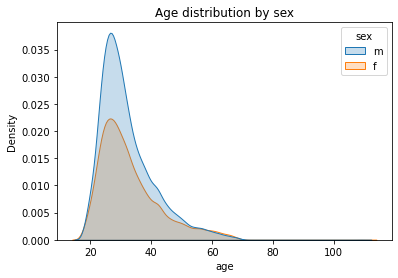

In [27]:
sns.kdeplot(data=df, x='age', hue='sex', fill=True).set(title='Age distribution by sex')

As one might expect, there are very similar distributions in terms of shape for both sexes, with the vast majority of users falling between 20 and 40. 

However, the disparate numbers of men and women makes it hard to how similar these are in terms of central tendency, so let's look at a box plot. 

[Text(0.5, 1.0, 'Age distribution by sex')]

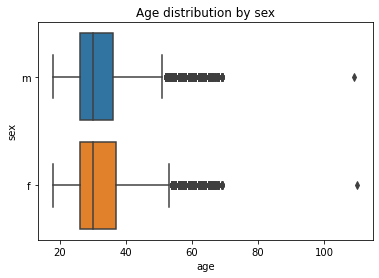

In [31]:
sns.boxplot(data=df, x='age', y='sex').set(title='Age distribution by sex')

These are essentially identical, making it unlikely that **age** would have enough predictive power to make it worth including.

#### Height

[Text(0.5, 1.0, 'Height distribution by sex')]

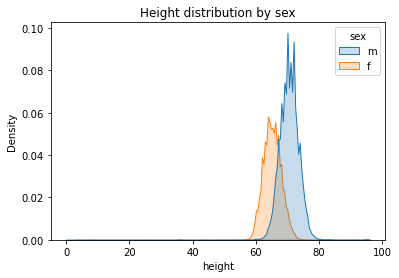

In [101]:
sns.kdeplot(data=df, x='height', hue='sex', fill=True).set(title='Height distribution by sex')

Although both distributions are roughly normal, it is clear that men on average are taller. This factor, **height**, would have strong predictive power.

#### Income

[Text(0.5, 1.0, 'Income distribution by sex')]

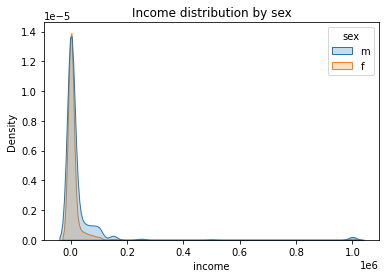

In [100]:
sns.kdeplot(data=df, x='income', hue='sex', fill=True).set(title='Income distribution by sex')

This last graph has a very odd shape! Let's take a look at the data to see what's going on.

In [8]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

The overwhelming majority of users list their income as '-1' for some reason, so this **income** data really isn't useable as it is. We could remove the '-1's of course, but that would mean that we would also lose 48442 rows of data!

### Categorical Variables

All in all, we have 17 columns of responses left to cover. Which is really quite a lot! In the interests of performing our EDA properly, I'll remove any of these variables that are unlikely to be useful for the machine learning models before we start. But how can we know in advance which variables will be particularly useful for our models? There are two factors that we can focus on: **number of potential responses** and **number of NaNs**.

If the number of potential responses is very high, we risk creating a very unwieldy dataset for our model to work with. Why? Because for every response to the question, we are going to create a new column, with either a 0 or a 1 (i.e., did/ didn't give this answer to this question). These new columns are known as dummy variables. If we have a column, or multiple columns, with thousands of different responses, this may be very computationally demanding.

If a column has a large number of NaNs, this can cause problems. If there is in NaN in the column in question, we may end up having to remove that row entirely, which, depending on the number of NaNs in the column, may involve us deleting a large part of our dataset. The alternative is to simply fill with a 0 (effectively a 'didn't answer') for each of our dummy variables in the case of an NaN. This is fine when there are only a few NaNs, but do this enough times and the accuracy of the model may be compromised.

In [66]:
cat_col_names = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sign', 'smokes', 'speaks', 'status']

cat_col = []

for col in cat_col_names:
    if df[col].nunique() <= 25:
        cat_col.append(col)
        
cat_col

['body_type',
 'diet',
 'drinks',
 'drugs',
 'job',
 'offspring',
 'orientation',
 'pets',
 'smokes',
 'status']

OK, so we've gone from 17 total columns to 10. That's a pretty large whittling down of the potential columns, simply by limiting the number of potential answers to 25!

Let's further whittle down our potential pool of variables by removing any column that includes more than 20% NaN values.

In [64]:
cat_cols = []
for col in cat_col:
    if (sum(df[col].isna()) / len(df[col])) < 0.2:
        cat_cols.append(col)
cat_cols

['body_type', 'drinks', 'job', 'orientation', 'smokes', 'status']

We're now down to just 6 potential variables. Let's visualise this data to see if it is differentiated enough by sex to make it worth including.

#### Body Type

[Text(0.5, 1.0, 'Body Type by sex')]

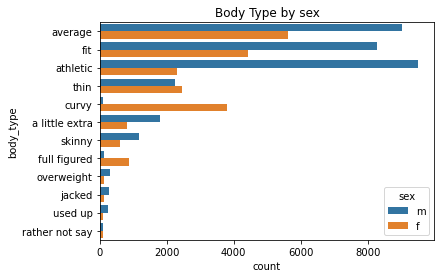

In [44]:
sns.countplot(data=df, y='body_type', hue='sex', order=df.body_type.value_counts().index).set(title='Body Type by sex')

It seems like responses to the **body type** question differ strongly be sex, and thus this factor would have strong predictive power.

Interestingly, this seems like a fairly clear case of gendered language (note 'skinny' and 'full-figured') rather than actual body type, which would likely be far less differentiated by sex.

#### Drinks

[Text(0.5, 1.0, 'Drink by sex')]

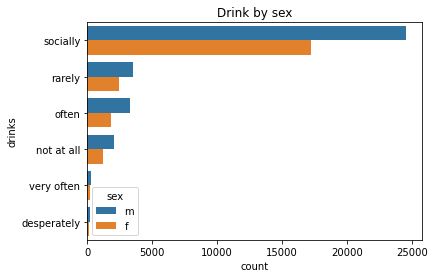

In [48]:
sns.countplot(data=df, y='drinks', hue='sex', order=df.drinks.value_counts().index).set(title='Drink by sex')

This factor, **drinks**, doesn't seem very differentiated by sex, so will not be particulary useful for our model.

#### Jobs

[Text(0.5, 1.0, 'Jobs by sex')]

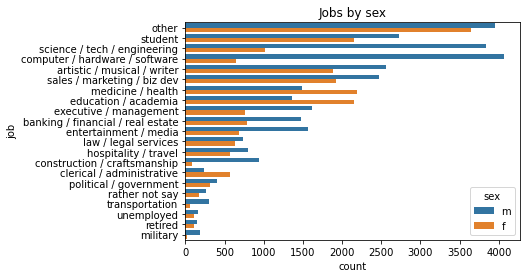

In [53]:
sns.countplot(data=df, y='job', hue='sex', order=df.job.value_counts().index).set(title='Jobs by sex')

This factor, **jobs**, has many factors that seem highly sex differentiated. See, for example, 'science/tech/engineering' and 'education/academia'. This would likely have high predictive power and could very well be useful for our model.

#### Orientation

[Text(0.5, 1.0, 'Sexual orientation by sex')]

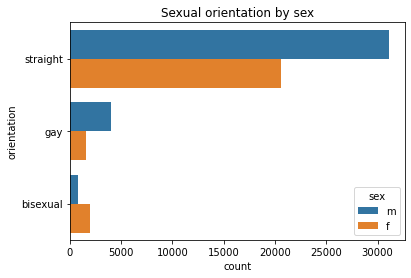

In [75]:
sns.countplot(data=df, y='orientation', hue='sex', order=df.orientation.value_counts().index).set(title='Sexual orientation by sex')

Interestingly, this factor, **orientation**, seems quite sex-differentiated, at least when it comes to gay and bisexual people.

#### Smokes

[Text(0.5, 1.0, 'Smoking status by sex')]

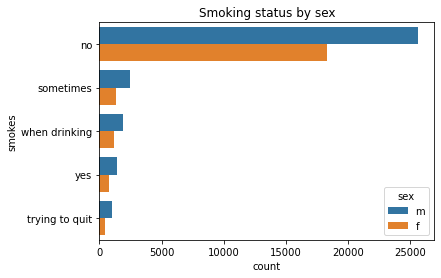

In [74]:
sns.countplot(data=df, y='smokes', hue='sex', order=df.smokes.value_counts().index).set(title='Smoking status by sex')

This factor, **smokes**, doesn't seem very differentiated by sex, so will not be particulary useful for our model.

#### Status

[Text(0.5, 1.0, 'Relationship status by sex')]

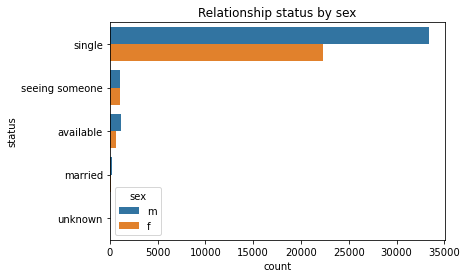

In [78]:
sns.countplot(data=df, y='status', hue='sex', order=df.status.value_counts().index).set(title='Relationship status by sex')

This factor, **status**, doesn't seem very differentiated by sex, so will not be particulary useful for our model.

To conclude, the variables that we will include in our model are: height, body type, jobs, and (sexual) orientation.

# Data Preparation

#### Dropping NaNs

The first thing we need to do is check for NaNs in the dataset. In this case, because we've removed the columns that had a lot of NaNs, we should be able to simply remove the rows that include NaNs. Let's see how many rows we lose by simply dropping the NaNs.

In [5]:
columns = ['height', 'body_type', 'job', 'orientation', 'sex']
new_df = df[columns]
new_df.shape

(59946, 5)

In [6]:
new_df.isnull().sum()

height            3
body_type      5296
job            8198
orientation       0
sex               0
dtype: int64

In [7]:
new_df = new_df.dropna()
new_df.shape

(47791, 5)

48000 rows should be more than sufficient for training purposes. But has this affected the proportion of male to female users?

In [8]:
new_df.sex.value_counts(normalize=True)

m    0.612521
f    0.387479
Name: sex, dtype: float64

The proportion of female users has only dropped by around a percentage point, so this proportion is acceptable.

#### Dummy Variables

Next we create dummy variables from our categorical variables. Dummy variables turn each answer to each question into a binary classifier (i.e. 'answered this', 'did not answer this').

In [9]:
categorical = ['body_type', 'job', 'orientation', 'sex']
# N.B. not including 'sex' in the dummy variables to avoid the dummy variable trap 
for col in categorical[:-1]:
    new_df = pd.get_dummies(new_df, columns=[col], prefix=[col])
new_df

,height,sex,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,...,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,orientation_bisexual,orientation_gay,orientation_straight
0,75.0,m,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,70.0,m,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,71.0,m,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,66.0,m,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,67.0,m,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,69.0,m,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59942,72.0,m,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59943,71.0,m,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59944,73.0,m,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The dataframe now has 38 columns.

#### Normalisation

Now that we've dealt with the categorical variables, we also have to deal with the quantitative variable - height. Because we've turned all the categorical variables into binary columns, we will now use min-max normalisation to give each user's height a value between 1 and 0.

In [10]:
num = min(new_df['height'])
denom = num + max(new_df['height'])
new_df['height'] = new_df['height'].apply(lambda x: (x + num)/denom)
new_df

,height,sex,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,...,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,orientation_bisexual,orientation_gay,orientation_straight
0,0.795918,m,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.744898,m,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.755102,m,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.704082,m,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.714286,m,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0.734694,m,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59942,0.765306,m,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59943,0.755102,m,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59944,0.775510,m,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Splitting Data

In order to train any supervised machine learning algorithm, we have to separate out our variables from our labels. It's also essential to separate our training data from our test data so we can evaluate our machine learning models at the end of this project.

In [11]:
cols_1 = new_df.columns[:1]
cols_2 = new_df.columns[2:]
variables = pd.concat([new_df[cols_1], new_df[cols_2]], axis=1)
variables

,height,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,orientation_bisexual,orientation_gay,orientation_straight
0,0.795918,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.744898,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.755102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.704082,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.714286,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0.734694,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59942,0.765306,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59943,0.755102,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59944,0.775510,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
labels = new_df['sex'].apply(lambda x: 0 if x == 'f' else 1)
labels

0        1
1        1
3        1
4        1
5        1
        ..
59937    1
59942    1
59943    1
59944    1
59945    1
Name: sex, Length: 47791, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(variables, labels, test_size=0.2, random_state=1)

# turn results to 1d arrays and reshape
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Building Machine Learning Models

Now we come to building the actual models. We have a number of classification algorithms to choose from, so below I briefly discuss the strengths and weaknesses of the models that I'll build below. For a summary of the pros and cons of various machine learning algorithms, see here: (https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6).

**K Nearest Neighbour Classifiers** have the advantage of not making assumptions about the data and being simple to implement, but are often slow and/or inaccurate for large datasets with large numbers of features.

**Logistic Regression Classifiers** are simple but effective classifiers that are particularly good for binary classification problems like this one, although are not as powerful as many other algorithms.

**Decision Tree Classifiers** have the advantage of being robust, but are slow and prone to overfitting. Comparatively, **Random Forest Classifiers** have the advantage of reducing error and the risk of overfitting compared to decision trees, but with the drawback that the variables need to have a lot of predictive power.

Other common classifiers were considered, including **Naive Bayes Classifiers** and **Support Vector Machines**, but rejected. In the case of Naive Bayes, this was because of thhe fundamental assumption that features are independent, which cannot be met in this instance. In the case of SVMs, this was because of the slowness of the algorithm in addition to the fact that it performs best when classes are separable.

#### Evaluation Metrics

As mentioned above, accuracy is not the end-all-be-all of metrics for evaluating how successful our classification models are. We will be using all four common metrics to evaluate our models.

**Accuracy:** the true positives divided by total values (i.e. the sum of true positives, false positives, true negatives, and false negatives)


**Precision:** the true positives divided by the actual number of positive values (i.e. the sum of the true positives and false negatives). Useful when the cost of a false positive is high.


**Recall:** the true positives divided by the positive guesses. (i.e., the sum of the true positives and false positives). Useful when the cost of a false negative is high.


**F1-score:** the harmonic mean of the precision and recall metrics. Useful as a metric when we need to balance between precision and recall.

#### Importing the Models and Metrics

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

### Building and Optimising K Nearest Neighbours Model

Let's begin by building a K Nearest Neighbours model.

In [93]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
print(classification_report(y_test, knn_predictions))
print(accuracy_score(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3646
           1       0.87      0.89      0.88      5913

    accuracy                           0.85      9559
   macro avg       0.85      0.84      0.84      9559
weighted avg       0.85      0.85      0.85      9559

0.8527042577675489


This isn't a bad start, but it begs the question: could we do better with a better value for k? Below, I iterate through all of the odd values of k between 1 and 99. Odd numbers are usually preferred over even values with this algorithm in order to ensure that there are no ties in the voting.

In [94]:
accuracy = {}
for i in range(1, 101, 2):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_predictions = knn_model.predict(x_test)
    accuracy[i] = accuracy_score(y_test, knn_predictions)
accuracy

{1: 0.8070927921330683,
 3: 0.8472643581964641,
 5: 0.8527042577675489,
 7: 0.8613871743906266,
 9: 0.8631656030965582,
 11: 0.8630609896432682,
 13: 0.8610733340307564,
 15: 0.8635840569097186,
 17: 0.8611779474840464,
 19: 0.860654880217596,
 21: 0.8590856784182446,
 23: 0.8570980228057328,
 25: 0.8578303169787634,
 27: 0.8578303169787634,
 29: 0.8614917878439168,
 31: 0.8617010147504969,
 33: 0.862851762736688,
 35: 0.8619102416570771,
 37: 0.862851762736688,
 39: 0.862956376189978,
 41: 0.8636886703630087,
 43: 0.8645255779893294,
 45: 0.8637932838162988,
 47: 0.8615964012972068,
 49: 0.861805628203787,
 51: 0.8624333089235275,
 53: 0.862851762736688,
 55: 0.8631656030965582,
 57: 0.8631656030965582,
 59: 0.8638978972695889,
 61: 0.8637932838162988,
 63: 0.8637932838162988,
 65: 0.8638978972695889,
 67: 0.8624333089235275,
 69: 0.8623286954702375,
 71: 0.8620148551103672,
 73: 0.861805628203787,
 75: 0.8620148551103672,
 77: 0.8623286954702375,
 79: 0.8617010147504969,
 81: 0.86075

<AxesSubplot:>

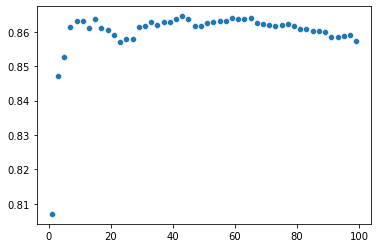

In [95]:
sns.scatterplot(data = accuracy, x=accuracy.keys(), y=accuracy.values())

In [96]:
max(accuracy.values())

0.8645255779893294

As we can see from the above dictionary and scatterplot, the model gets better from 1 onwards until peaking at 15, at which point the benefits seem to plateau (the lowest number of neighbors to beat 15 for accuracy is 41!). We will therefore set the neighbors to 15, rather than 5 as in our initial attempt.

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
print(classification_report(y_test, knn_predictions))
print(accuracy_score(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3646
           1       0.87      0.91      0.89      5913

    accuracy                           0.86      9559
   macro avg       0.86      0.85      0.85      9559
weighted avg       0.86      0.86      0.86      9559

0.8635840569097186


We have gained around 1% accuracy by optimising for the value of k, which is a fairly small but not insubstantial gain.

### Building a Logistic Regression Model

Next, we will build a logistic regression model. In this instance, I have had to increase the max iterations from sklearn's default of 100 to 200 in order to get the algorithm to converge.

In [16]:
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=0)
log_reg_model.fit(x_train, y_train)
log_reg_predictions = log_reg_model.predict(x_test)
print(classification_report(y_test, log_reg_predictions))
print(accuracy_score(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3646
           1       0.88      0.92      0.90      5913

    accuracy                           0.87      9559
   macro avg       0.87      0.85      0.86      9559
weighted avg       0.87      0.87      0.87      9559

0.8705931582801548


This is a (very!) marginal improvement over our optimised K Nearest Neigbours algorithm in terms of all our key metrics.

### Building a Decision Tree Model, Avoiding Overfitting, and the Random Forest Model

Finally, let's build a decision tree model to see if we can improve on our logistic regression model.

In [28]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(x_train, y_train)
tree_predictions = tree_model.predict(x_test)
print(classification_report(y_test, tree_predictions))
print(accuracy_score(y_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3646
           1       0.88      0.91      0.90      5913

    accuracy                           0.87      9559
   macro avg       0.86      0.86      0.86      9559
weighted avg       0.87      0.87      0.87      9559

0.8682916623077728


This is slightly worse than our logistic regression model, although, interestingly, all our models are performing almost exactly the same on our key metrics. One potential problem we may run into here is overfitting, however, a problem known to affect decision tree models. Let's look at the depth.

In [29]:
tree_model.get_depth()

36

This is quite a lot of depth, which may potentially cause overfitting. Let's look at the feature importance to evaluate whether we could reduce the depth without substantially reducing the efficacy of the model.

In [30]:
tree_model.feature_importances_

array([0.75180487, 0.00450004, 0.01053488, 0.00505641, 0.08017569,
       0.00364927, 0.01716801, 0.00196767, 0.00292732, 0.00132671,
       0.00324682, 0.01154833, 0.0026274 , 0.00276427, 0.00197658,
       0.0030039 , 0.01571095, 0.00570319, 0.00650119, 0.00227856,
       0.00163255, 0.00210483, 0.00294028, 0.00506083, 0.00121915,
       0.00475801, 0.00172866, 0.00207833, 0.00116238, 0.0035038 ,
       0.00838541, 0.00377267, 0.00223475, 0.00176792, 0.0063352 ,
       0.00985704, 0.00698615])

Well, perhaps predictably, our 'height' column is doing almost all of the work in this model ... To our point, there are several features with very minimal predictive power here, so we should be able to reduce the depth without much loss in our key metrics.

In [31]:
tree_model_2 = DecisionTreeClassifier(max_depth = 10, random_state=0)
tree_model_2.fit(x_train, y_train)
tree_predictions_2 = tree_model_2.predict(x_test)
print(classification_report(y_test, tree_predictions_2))
print(accuracy_score(y_test, tree_predictions_2))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3646
           1       0.88      0.91      0.89      5913

    accuracy                           0.87      9559
   macro avg       0.86      0.85      0.86      9559
weighted avg       0.87      0.87      0.87      9559

0.8657809394288105


That's a very small loss in our key metrics in exchange for a fairly large reduction in depth, and thus also the chance of overfitting to the training data and being unable to generalise to another dataset.

Could we potentially improve our model further by changing from a single decision tree to a random forest? Let's see.

In [111]:
forest_model = RandomForestClassifier(n_estimators = 2000, random_state=0)
forest_model.fit(x_train, y_train)
forest_predictions = forest_model.predict(x_test)
print(classification_report(y_test, forest_predictions))
print(accuracy_score(y_test, forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3646
           1       0.88      0.92      0.90      5913

    accuracy                           0.87      9559
   macro avg       0.87      0.85      0.86      9559
weighted avg       0.87      0.87      0.87      9559

0.8700700910137044


This is a very minimal improvement, but an improvement nonetheless. We don't have to reduce the max depth with random forest classifiers because they are much less prone to overfitting (because each 'tree' in the forest considers only a subset of features and the final outcome is the result of a 'vote' between all the trees).

### Evaluating Our Models

Let's see which of our three models does best for each of our four key metrics (N.B. in this case we are taking our random forest model with a max depth of 10 as the best version of that model).

In [112]:
# Accuracy
print(accuracy_score(y_test, knn_predictions))
print(accuracy_score(y_test, log_reg_predictions))
print(accuracy_score(y_test, forest_predictions))

0.8635840569097186
0.8705931582801548
0.8700700910137044


In [113]:
# Precision
print(precision_score(y_test, knn_predictions))
print(precision_score(y_test, log_reg_predictions))
print(precision_score(y_test, forest_predictions))

0.8712743676494281
0.8757634201221473
0.8771193282738576


In [114]:
# Recall
print(recall_score(y_test, knn_predictions))
print(recall_score(y_test, log_reg_predictions))
print(recall_score(y_test, forest_predictions))

0.9145949602570607
0.9215288347708439
0.9186538136309825


In [115]:
# F1
print(f1_score(y_test, knn_predictions))
print(f1_score(y_test, log_reg_predictions))
print(f1_score(y_test, forest_predictions))

0.8924092409240925
0.8980634528224144
0.8974062448372708


There's almost nothing in this, but Logistic Regression had the highest accuracy, recall, and F1 score. Considering how much quicker it is to implement than Random Forests, I think it's fair to say we have a winner! 

The only way case where we would prefer the Random Forest model would be in cases where precision was the most important metric, as it would be in cases where the cost of a false positive is exceptionally high. In our case, it seems to me that a false positive is no worse than a false positive, so our Logistic Regression model seems the clear winner.

# Conclusion

**Overall**, this project was reasonably successful. I managed to build three reasonably successful classifiers that all performed in the range of 86-87% in terms of accuracy and 89% in terms of F1 score. Seeing as a model that simply picked 'm' every time would have scored around 60% for accuracy, this is not a roaring success, but is still a significant improvement over a simple heuristic like that.

Despite attempts at optimisation, neither the K Nearest Neighbor nor Decision Tree/ Random Forest classifiers were quite able to match the basic Logistic Regression model. This is somewhat disappointing, but in my view, the extreme similarity in the performance of the models, optimised or not, points to the fact that we were getting quite close to optimal scores in our evaluation metrics with the four variables we chose to include ('height', 'body_type', 'job', and 'orientation'). In terms of predictive power, in fact, the majority of the work was done by a single variable, height, as we can see from the below.

In [116]:
coefs = log_reg_model.coef_.ravel()
var_cols = variables.columns

dct = {}
for i in range(len(var_cols)):
    dct[var_cols[i]] = coefs[i]
sorted_dct = {k: v for k, v in sorted(dct.items(), key=lambda item: abs(item[1]), reverse=True)}

first_ten = dict(list(sorted_dct.items())[:10])
first_ten

{'height': 45.35526989376677,
 'body_type_curvy': -3.0642676534726605,
 'body_type_full figured': -1.8736498046637802,
 'job_construction / craftsmanship': 1.590288312569184,
 'job_military': 1.2070102622461674,
 'job_computer / hardware / software': 1.129967556095316,
 'job_clerical / administrative': -1.1268174917566223,
 'body_type_athletic': 1.0877005391979506,
 'job_education / academia': -1.041698059813896,
 'job_transportation': 0.9726540647504632}

As we can see, height has 15 times the predictive power of the next best variable ('body_type_curvy'). The obvious **next steps** to improve the performance of the model would be to include more variables in our analysis and to take steps to optimise our logistic regression model.